This project focuses on the statistical comparison of lifetime data between two groups of cavies (guinea pigs):
a ***control group*** and a ***bacilli-infected group***.

The goal is to conduct a comparative analysis of the statistical data from both groups,aiming to understand the behaviors and patterns in the lifetimes of the subjects. By doing so, we aim to draw meaningful insights into how bacilli infection influences the subjects, as well as any significant differences or trends between the two groups.

**1. Load the data file and separate the observed variable into the respective two observed groups.
Briefly describe the data and the problem under investigation.
Estimate the mean, variance, and median of the respective distributions separately for each group.**

This code block sets up an environment for analyzing the lifetimes of two groups of cavies: a control group and a bacilli-infected group.

It imports libraries like `matplotlib` for plotting, `numpy` for numerical operations, and `pandas` for data handling.
Custom configuration modules define settings for analysis and plotting.

The `%matplotlib inline` command ensures plots are displayed directly in the Jupyter notebook, facilitating immediate visualization of the statistical results.

This setup is crucial for a thorough examination and comparison of the two groups' lifetime data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from scipy.stats import t
from config import topic_config, dataset_config, histogram_config, edf_config, distribution_config

This block of code features a function named `print_topic_number` designed to select and display a topic number for our project from a range of options.

The function calculates the topic number based on two integer parameters, k and l, using the formula: `(((k + l) * 47) % 11) + 1)`.

This formula ensures a unique and consistent topic number is generated from the given parameters.

The function is then called with parameters sourced from `topic_config`, specifically the `BIRTH_DAY` and `SURNAME_LEN` values.

In [2]:
def print_topic_number(k, l):
    """
    Calculates and prints the topic number based on given parameters.

    The function takes two integer parameters, k and l, and applies a specific formula
    to compute the topic number. The result is then printed out.
    The formula used is: (((k + l) * 47) % 11) + 1.

    :param k: The first parameter to be included in the calculation.
    :type k: int

    :param l: The second parameter to be included in the calculation.
    :type l: int
    """
    topic_number = (((k + l) * 47) % 11) + 1

    print(f'Topic number: {topic_number}.')

In [3]:
print_topic_number(topic_config['BIRTH_DAY'], topic_config['SURNAME_LEN'])

Topic number: 9.


This code block uses pandas to load a CSV dataset into a DataFrame `df`, then splits it into two groups: ***control*** and ***bacilli***, based on their ***Group*** attribute.

Each group's ***Lifetime*** data is then extracted into separate Series, `control_lifetime` and `bacilli_lifetime`, preparing the data for further analysis.

In [4]:
# df: pandas.DataFrame - DataFrame containing the entire dataset.
df = pd.read_csv(dataset_config['PATH'], sep=dataset_config['SEP'])

# control: pandas.DataFrame - DataFrame filtered to include only the 'control' group.
control = df[df['Group'] == 'control']
# bacilli: pandas.DataFrame - DataFrame filtered to include only the 'bacilli' group.
bacilli = df[df['Group'] == 'bacilli']

# control_lifetime: pandas.Series - Series containing the 'Lifetime' data for the 'control' group.
control_lifetime = control['Lifetime']
# bacilli_lifetime: pandas.Series - Series containing the 'Lifetime' data for the 'bacilli' group.
bacilli_lifetime = bacilli['Lifetime']

This code block includes a function `print_data` that prints the number of rows in a DataFrame and then displays its contents using the `display` function, offering a quick overview of the dataset's size and structure.

It's demonstrated on the DataFrame `df`, efficiently showing the data's scale and initial entries.

In [5]:
def print_data(data):
    """
    Prints the size of the DataFrame and displays its content.

    This function prints the number of rows in the DataFrame to give a quick sense of its size.
    It then uses the 'display' function, typically available in Jupyter Notebooks,
    to output the DataFrame itself in a formatted style.

    :param data: The DataFrame whose size is to be printed and content is to be displayed.
    :type data: pandas.DataFrame
    """
    print(f'Data size: {len(data)}.')

    display(data)

In [6]:
print_data(df)

Data size: 122.


,Lifetime,Group
0,18,control
1,36,control
2,50,control
3,52,control
4,86,control
...,...,...
117,406,bacilli
118,459,bacilli
119,466,bacilli
120,592,bacilli


This code defines the `print_group` function, which prints the name and size of a specified data group and displays its contents.

It's used here to succinctly summarize and visualize each guinea pig group's data from the dataset.

In [7]:
def print_group(group_data, group_name):
    """
    Prints the name and size of the specified group and displays its data.

    This function is designed to provide a summary of a given group. It prints the name of the group,
    the number of observations within the group, and then uses the display function to present the
    group data in an interactive context like a Jupyter Notebook.

    :param group_data: The data for the group to be displayed.
    :type group_data: pandas.DataFrame or pandas.Series

    :param group_name: The name of the group to be printed.
    :type group_name: str
    """
    print(f'Group name: {group_name}.')
    print(f'Group size: {len(group_data)}.')

    display(group_data)

In [8]:
print_group(control, 'control')

Group name: control.
Group size: 64.


,Lifetime,Group
0,18,control
1,36,control
2,50,control
3,52,control
4,86,control
...,...,...
59,663,control
60,685,control
61,688,control
62,725,control


In [9]:
print_group(bacilli, 'bacilli')

Group name: bacilli.
Group size: 58.


,Lifetime,Group
64,76,bacilli
65,93,bacilli
66,97,bacilli
67,107,bacilli
68,108,bacilli
69,113,bacilli
70,114,bacilli
71,119,bacilli
72,136,bacilli
73,138,bacilli


This code block defines a set of functions to calculate and display key statistical measures for each group of guinea pig data.

The functions `get_group_mean`, `get_group_var`, and `get_group_median` calculate the mean, variance, and median of a group's lifetime data, respectively.

The `print_group_stats` function then prints these statistics along with the group's name, providing a concise summary of the lifetime duration's central tendency and variability for each group.

This allows for a clear comparison and understanding of the behavior and characteristics of the ***control*** and ***bacilli-infected groups***.

In [10]:
def get_group_mean(group_data):
    """
    Calculates the mean of the group's data.

    :param group_data: The data for which the mean is to be calculated.
    :type group_data: pandas.Series

    :return: The mean of the group's data.
    :rtype: float
    """
    return group_data.mean()


def get_group_var(group_data):
    """
    Calculates the variance of the group's data.

    :param group_data: The data for which the variance is to be calculated.
    :type group_data: pandas.Series

    :return: The variance of the group's data.
    :rtype: float
    """
    return group_data.var()


def get_group_median(group_data):
    """
    Calculates the median of the group's data.

    :param group_data: The data for which the median is to be calculated.
    :type group_data: pandas.Series

    :return: The median of the group's data.
    :rtype: float
    """
    return group_data.median()


def print_group_stats(group_data, group_name):
    """
    Prints statistical measures of the group's data: mean, variance, and median.

    This function prints the name of the group followed by statistical measures
    including the mean, variance, and median of the group's data. These statistics
    help provide an understanding of the central tendency and variability within the data.

    :param group_data: The data for which statistics are to be printed.
    :type group_data: pandas.Series

    :param group_name: The name of the group.
    :type group_name: str
    """
    print(f'Group name: {group_name}.')
    print(f'Group lifetime duration mean: {get_group_mean(group_data)}.')
    print(f'Group lifetime duration var: {get_group_var(group_data)}.')
    print(f'Group lifetime duration median: {get_group_median(group_data)}.')

In [11]:
print_group_stats(control_lifetime, 'control')

Group name: control.
Group lifetime duration mean: 345.234375.
Group lifetime duration var: 49371.67435515873.
Group lifetime duration median: 316.5.


In [12]:
print_group_stats(bacilli_lifetime, 'bacilli')

Group name: bacilli.
Group lifetime duration mean: 242.5344827586207.
Group lifetime duration var: 13907.691772534785.
Group lifetime duration median: 214.5.


**2. Estimate the density and distribution function for each group separately using histograms and the
empirical distribution function.**

This code block introduces the `plot_group_histogram` function, which visualizes the lifetime distribution of a specific guinea pig group using a histogram.

It takes the group's numerical data and name, then generates a histogram with the appearance defined by the `histogram_config` dictionary.
This includes settings for the number of bins, density, transparency, color, and edge color.

The histogram displays the distribution density against the lifetime duration, providing a visual representation of the data's spread and concentration.

By using Matplotlib's `pyplot`, this function effectively illustrates the lifetime distribution for each group, enhancing the understanding of their characteristics.

In [13]:
def plot_group_histogram(group_data, group_name):
    """
    Plots a histogram for the group's lifetime data.

    This function takes a pandas Series containing numerical data and a group name, then
    generates a histogram to visualize the distribution of the group's lifetime. The appearance
    of the histogram is defined by the histogram_config dictionary.

    :param group_data: Numerical data for the group.
    :type group_data: pandas.Series

    :param group_name: The name of the group to be displayed on the histogram.
    :type group_name: str
    """
    plt.hist(group_data, bins=histogram_config['BINS'], density=histogram_config['DENSITY'],
             alpha=histogram_config['ALPHA'], color=histogram_config['COLOR'], edgecolor=histogram_config['EDGE_COLOR'])
    plt.title(f'Histogram: {group_name} group lifetime')
    plt.xlabel('Lifetime duration')
    plt.ylabel('Distribution density')
    plt.show()

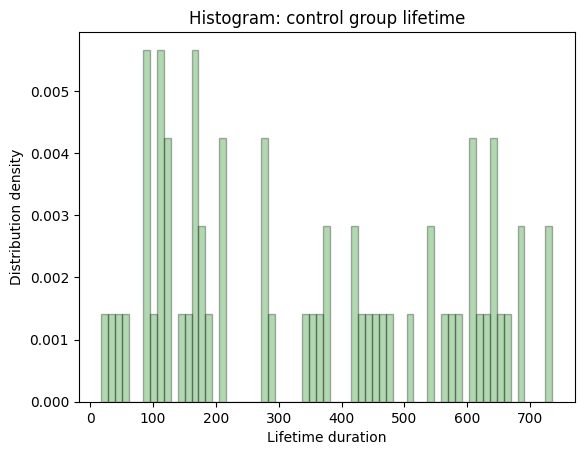

In [14]:
plot_group_histogram(control_lifetime, 'control')

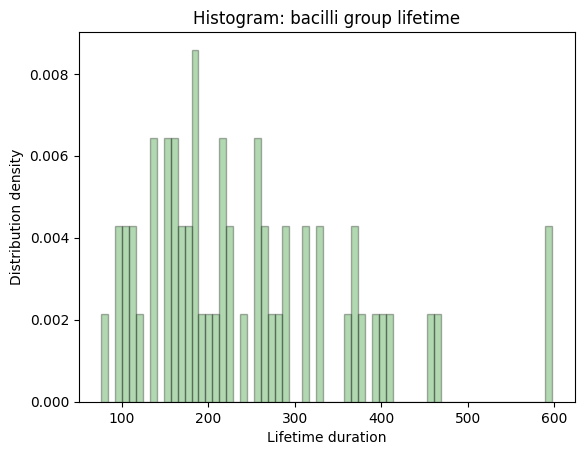

In [15]:
plot_group_histogram(bacilli_lifetime, 'bacilli')

This code block defines the `plot_group_edf` function, which creates an ***Empirical Distribution Function (EDF)*** plot for a group's lifetime data.

It starts by taking the group's numerical data and name, then prepares the data by sorting it and calculating the cumulative probability for each data point.
These prepared values are used to generate the EDF plot using Matplotlib's `plt.step` function.

The plot's appearance is customized according to the `edf_config` dictionary, specifying the color and line width.

The EDF plot visually represents the cumulative probability against the lifetime duration for the group, providing insights into the probability distribution of the subjects' lifetimes.

This function, therefore, offers a clear and detailed visualization of the entire distribution of the group's lifetime data.

In [16]:
def plot_group_edf(group_data, group_name):
    """
    Plots the Empirical Distribution Function (EDF) for the group's lifetime data.

    This function takes a pandas Series containing numerical data and a group name, then
    generates a plot of the Empirical Distribution Function (EDF) to visualize the cumulative
    probability distribution of the group's lifetime. The appearance of the EDF plot is defined
    by the edf_config dictionary.

    :param group_data: Numerical data for the group.
    :type group_data: pandas.Series

    :param group_name: The name of the group to be displayed on the EDF plot.
    :type group_name: str
    """
    sort_data = np.sort(group_data)
    ecdf_data = np.arange(1, len(sort_data) + 1) / len(sort_data)

    plt.step(sort_data, ecdf_data, label='ECDF', color=edf_config['COLOR'], linewidth=edf_config['LINE_WIDTH'])
    plt.title(f'Empirical Distribution Function: {group_name} group lifetime')
    plt.xlabel('Lifetime duration')
    plt.ylabel('Cumulative probability')
    plt.legend()
    plt.show()

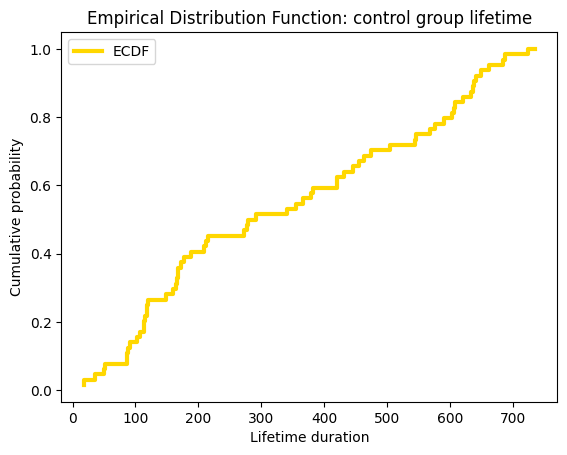

In [17]:
plot_group_edf(control_lifetime, 'control')

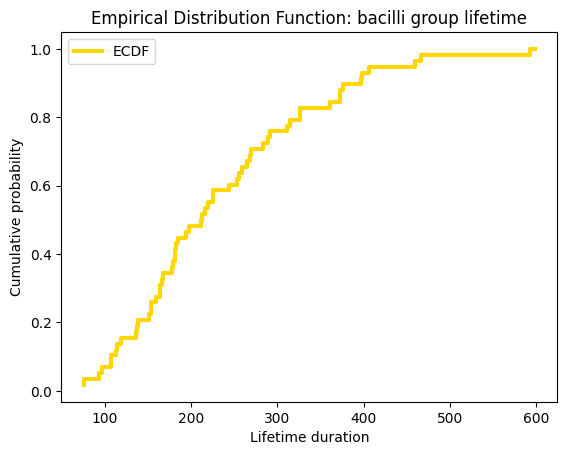

In [18]:
plot_group_edf(bacilli_lifetime, 'bacilli')

**3. Find the closest distribution for each group separately: estimate the parameters of the normal, exponential, and uniform distributions.
Enter the corresponding densities with the estimated parameters into the histogram charts.
Discuss which of the distributions best matches the observed data.**

This code block comprises a suite of functions designed to estimate the parameters for different statistical distributions based on each group's lifetime data. The goal is to identify the most likely distribution underlying the data.

`get_group_unif_min` and `get_group_unif_max` calculate the minimum and maximum values for a uniform distribution. The uniform distribution is characterized by these two parameters: the minimum value `a` and the maximum value `b`. It assumes a constant probability density across this range.

`get_group_exp_lambda` computes the lambda `λ` parameter for an exponential distribution, which is the rate parameter. The exponential distribution is often used to model the time between events in a process. The expected value (or mean) of an exponential distribution is the reciprocal of the rate parameter:
    $$\lambda = \frac{1}{\text{mean}}$$

`get_group_norm_mu` calculates the mean `mu` of the group's data. The mean is the central location of the distribution.
`get_group_norm_sigma` computes the standard deviation `sigma`, which measures the spread of the data around the mean. The standard deviation is the square root of the variance.

`print_group_distributions_stats` consolidates these estimations and prints them for a specified group. It reports the estimated parameters for ***Uniform***, ***Exponential***, and ***Normal distributions***, providing a comprehensive view of the potential distributions underlying the group's lifetime data.

By estimating these parameters, the functions help in hypothesizing which distribution best fits the data, which is crucial for subsequent analysis like hypothesis testing, predictive modeling, and more.


In [19]:
def get_group_unif_min(group_data):
    """
    Calculates the minimum value of the uniform distribution for the group's data.

    :param group_data: The data for which the minimum is to be calculated.
    :type group_data: pandas.Series

    :return: The minimum value of the group's data.
    :rtype: float
    """
    return group_data.min()


def get_group_unif_max(group_data):
    """
    Calculates the maximum value of the uniform distribution for the group's data.

    :param group_data: The data for which the maximum is to be calculated.
    :type group_data: pandas.Series

    :return: The maximum value of the group's data.
    :rtype: float
    """
    return group_data.max()


def get_group_exp_lambda(group_data):
    """
    Calculates the lambda (rate) parameter of the exponential distribution for the group's data.

    :param group_data: The data for which the exponential lambda is to be calculated.
    :type group_data: pandas.Series

    :return: The lambda parameter of the exponential distribution.
    :rtype: float
    """
    return 1 / group_data.mean()


def get_group_norm_mu(group_data):
    """
    Calculates the mean (mu) parameter of the normal distribution for the group's data.

    :param group_data: The data for which the mean is to be calculated.
    :type group_data: pandas.Series

    :return: The mean of the group's data.
    :rtype: float
    """
    return group_data.mean()


def get_group_norm_sigma(group_data):
    """
    Calculates the standard deviation (sigma) of the normal distribution for the group's data.

    :param group_data: The data for which the standard deviation is to be calculated.
    :type group_data: pandas.Series

    :return: The standard deviation of the group's data.
    :rtype: float
    """
    return group_data.std(ddof=1)


def print_group_distributions_stats(group_data, group_name):
    """
    Prints estimated distribution parameters for the given group's data.

    This function prints out estimations for uniform, exponential, and normal distributions
    based on the group's data. It includes minimum and maximum for uniform distribution,
    lambda for exponential distribution, and mu (mean) and sigma (standard deviation) for normal distribution.

    :param group_data: The data for which distribution parameters are to be estimated.
    :type group_data: pandas.Series

    :param group_name: The name of the group.
    :type group_name: str
    """
    print(f'Group name: {group_name}.')
    print('Unif estimations:')
    print(f'    - Group lifetime duration min: {get_group_unif_min(group_data)}.')
    print(f'    - Group lifetime duration max: {get_group_unif_max(group_data)}.')
    print('Exp estimations:')
    print(f'    - Group lifetime duration lambda: {get_group_exp_lambda(group_data)}.')
    print('Norm estimations:')
    print(f'    - Group lifetime duration mu: {get_group_norm_mu(group_data)}.')
    print(f'    - Group lifetime duration sigma: {get_group_norm_sigma(group_data)}.')

In [20]:
print_group_distributions_stats(control_lifetime, 'control')

Group name: control.
Unif estimations:
    - Group lifetime duration min: 18.
    - Group lifetime duration max: 735.
Exp estimations:
    - Group lifetime duration lambda: 0.002896582937316135.
Norm estimations:
    - Group lifetime duration mu: 345.234375.
    - Group lifetime duration sigma: 222.19737702132923.


In [21]:
print_group_distributions_stats(bacilli_lifetime, 'bacilli')

Group name: bacilli.
Unif estimations:
    - Group lifetime duration min: 76.
    - Group lifetime duration max: 598.
Exp estimations:
    - Group lifetime duration lambda: 0.004123125044430227.
Norm estimations:
    - Group lifetime duration mu: 242.5344827586207.
    - Group lifetime duration sigma: 117.93087709558843.


This code block includes functions for analyzing each group's data by calculating and plotting the density for three different distributions: ***Uniform***, ***Exponential***, and ***Normal***, each with its specific density formula.

`get_group_unif_density` computes the uniform distribution density for the group's data using the formula:
$$\text{density} = \frac{1}{\text{max} - \text{min}}$$, representing a constant density across the range of data.

`get_group_exp_density` calculates the exponential distribution density with the formula:
$$\text{density} = \lambda e^{-\lambda x}$$, where `lambda` is the rate parameter, reflecting the likelihood of an event over time.

`get_group_norm_density` computes the normal distribution density using:
$$\text{density} = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$, where `mu` is the mean and `sigma` is the standard deviation, indicating how data is dispersed around the mean.

`plot_group_histogram_vs_distribution` plots the group's lifetime data as a histogram and overlays it with the calculated distribution density, allowing for visual comparison between the empirical data and the theoretical model.

`plot_group_histogram_vs_distributions` utilizes the previous function for each distribution type, creating separate plots for the ***Uniform***, ***Exponential***, and ***Normal*** densities against the group's histogram.

These functions collectively provide a comprehensive toolset to compare the empirical data of each group with theoretical distributions, aiding in understanding the distribution that best characterizes the lifetime data of the guinea pigs.


In [22]:
def get_group_unif_density(group_data):
    """
    Calculates the density of a uniform distribution based on group data.

    :param group_data: The data for which the uniform density is to be calculated.
    :type group_data: pandas.Series

    :return: The uniform density value for each element in the group data.
    :rtype: numpy.ndarray
    """
    unif_min, unif_max = get_group_unif_min(group_data), get_group_unif_max(group_data)

    return np.full(len(group_data), 1 / (unif_max - unif_min))


def get_group_exp_density(group_data):
    """
    Calculates the density of an exponential distribution based on group data.

    :param group_data: The data for which the exponential density is to be calculated.
    :type group_data: pandas.Series

    :return: The exponential density value for each element in the group data.
    :rtype: numpy.ndarray
    """
    exp_lambda = get_group_exp_lambda(group_data)

    return exp_lambda * np.exp(-exp_lambda * group_data)


def get_group_norm_density(group_data):
    """
    Calculates the density of a normal distribution based on group data.

    :param group_data: The data for which the normal density is to be calculated.
    :type group_data: pandas.Series

    :return: The normal density value for each element in the group data.
    :rtype: numpy.ndarray
    """
    norm_mu, norm_sigma = get_group_norm_mu(group_data), get_group_norm_sigma(group_data)

    return (1 / (norm_sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((group_data - norm_mu) / norm_sigma) ** 2)


def plot_group_histogram_vs_distribution(group_data, group_name, distribution_density, distribution_name):
    """
    Plots a histogram of the group's data against a given distribution's density.

    :param group_data: The data for which the histogram is to be plotted.
    :type group_data: pandas.Series

    :param group_name: The name of the group.
    :type group_name: str

    :param distribution_density: The density of the distribution to be plotted against the histogram.
    :type distribution_density: numpy.ndarray

    :param distribution_name: The name of the distribution (e.g., 'Unif', 'Exp', 'Norm').
    :type distribution_name: str
    """
    plt.hist(group_data, bins=histogram_config['BINS'], density=histogram_config['DENSITY'],
             alpha=histogram_config['ALPHA'], color=histogram_config['COLOR'], edgecolor=histogram_config['EDGE_COLOR'])
    plt.plot(group_data, distribution_density, label=f'{distribution_name}', color=distribution_config['COLOR'],
             linewidth=distribution_config['LINE_WIDTH'])
    plt.title(f'Histogram: {group_name} group lifetime VS Distribution: {distribution_name}')
    plt.xlabel('Lifetime duration')
    plt.ylabel('Distribution density')
    plt.legend()
    plt.show()


def plot_group_histogram_vs_distributions(group_data, group_name):
    """
    Plots a histogram of the group's data against different distribution densities (Uniform, Exponential, Normal).

    :param group_data: The data for which the histogram and distribution plots are to be created.
    :type group_data: pandas.Series

    :param group_name: The name of the group.
    :type group_name: str
    """
    group_lifetime_unif_density = get_group_unif_density(group_data)
    group_lifetime_exp_density = get_group_exp_density(group_data)
    group_lifetime_norm_density = get_group_norm_density(group_data)

    plot_group_histogram_vs_distribution(group_data, group_name, group_lifetime_unif_density, 'Unif')
    plot_group_histogram_vs_distribution(group_data, group_name, group_lifetime_exp_density, 'Exp')
    plot_group_histogram_vs_distribution(group_data, group_name, group_lifetime_norm_density, 'Norm')

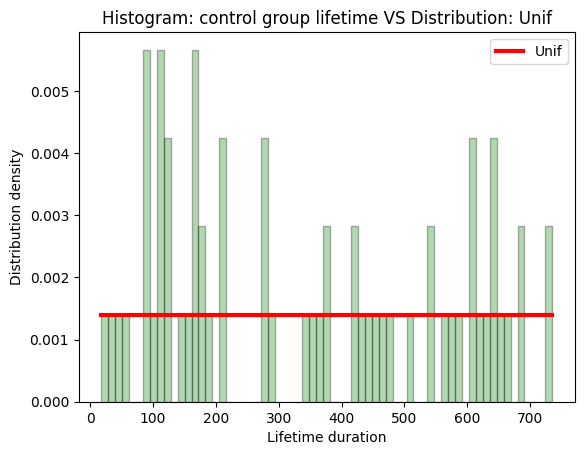

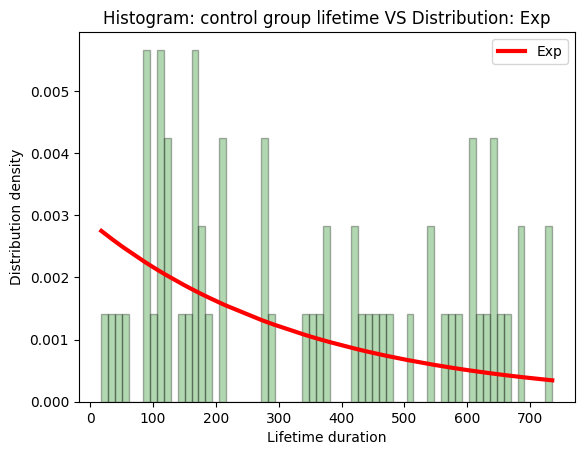

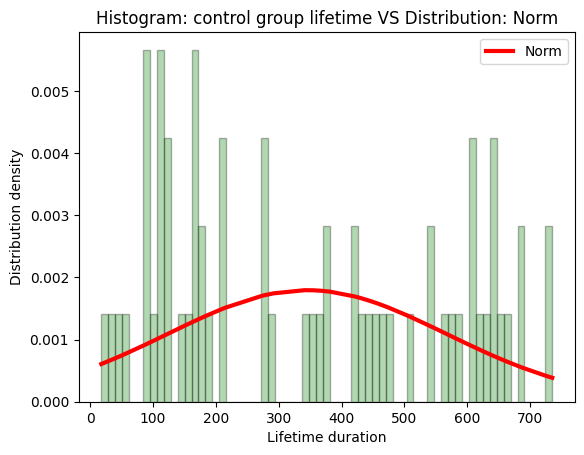

In [23]:
plot_group_histogram_vs_distributions(control_lifetime, 'control')

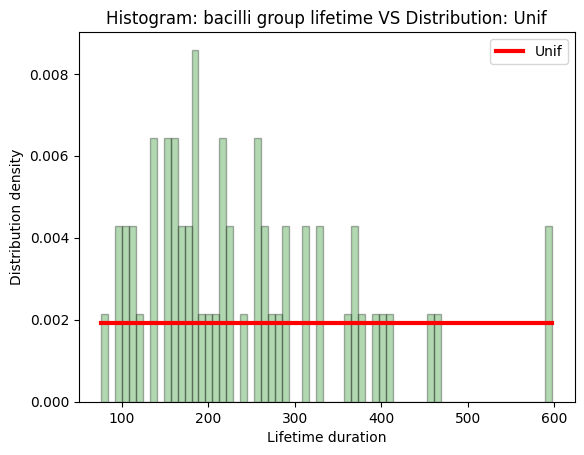

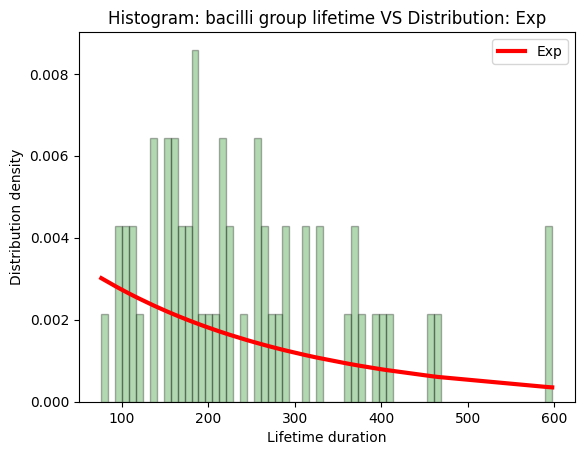

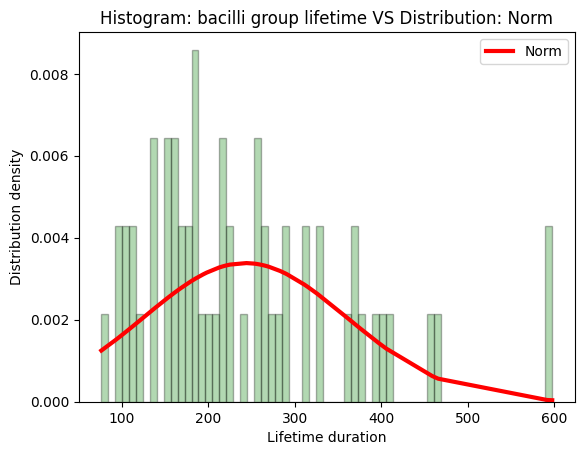

In [24]:
plot_group_histogram_vs_distributions(bacilli_lifetime, 'bacilli')

Based on observations, it's advisable to discount both the ***Uniform*** and ***Exponential distributions*** for both groups.

Among the three distributions considered, the data from both groups appear to more closely fit a ***Normal distribution***. This suggests that the lifetime data for each group exhibits characteristics — such as symmetry around a central mean and a predictable dispersion — that are more in line with the properties of a normal distribution.

**4. Generate a random sample of 100 values from the distribution you have chosen as the closest for each group separately, with the parameters estimated in the previous point.
Compare the histogram of simulated values with the observed data.**

This code block introduces two functions designed to compare the distribution of actual group data with that of simulated data based on a previously determined ***Normal distribution***.

`get_group_norm_simulation`: This function generates simulated data points based on the ***Normal distribution*** parameters (mean and standard deviation) derived from the actual group data. It uses the `np.random.normal` function to create a numpy array of 100 simulated data points with the same mean (mu) and standard deviation (sigma) as the actual group data.

`plot_group_histogram_vs_simulation_histogram`: This function creates two histograms for comparative analysis. The first histogram is for the actual data of the group, plotted using the previously defined `plot_group_histogram` function. The second histogram represents the simulated data generated by the `get_group_norm_simulation` function. Both histograms are plotted sequentially with their respective group names.

This visual comparison helps to assess how well the ***Normal distribution***, as characterized by the actual data's parameters, represents the distribution of the actual data itself.

In [25]:
def get_group_norm_simulation(group_data):
    """
    :param group_data: The data from which the normal distribution parameters are derived.
    :type group_data: pandas.Series

    :return: A numpy array of simulated data points.
    :rtype: numpy.ndarray
    """
    norm_mu, norm_sigma = get_group_norm_mu(group_data), get_group_norm_sigma(group_data)

    return np.random.normal(norm_mu, norm_sigma, 100)


def plot_group_histogram_vs_simulation_histogram(group_data, group_name):
    """
    Plots histograms of the actual group data and its simulated counterpart.

    This function creates two histograms: one for the actual data of the group and another for
    the simulated data generated based on the normal distribution parameters of the actual data.
    The histograms are plotted sequentially to facilitate comparison.

    :param group_data: The actual data of the group.
    :type group_data: pandas.Series

    :param group_name: The name of the group.
    :type group_name: str
    """
    simulation_data = get_group_norm_simulation(group_data)

    plot_group_histogram(group_data, group_name)
    plot_group_histogram(simulation_data, f'simulation {group_name}')

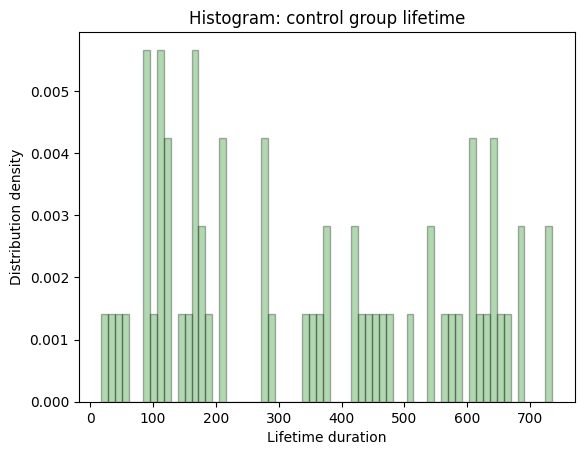

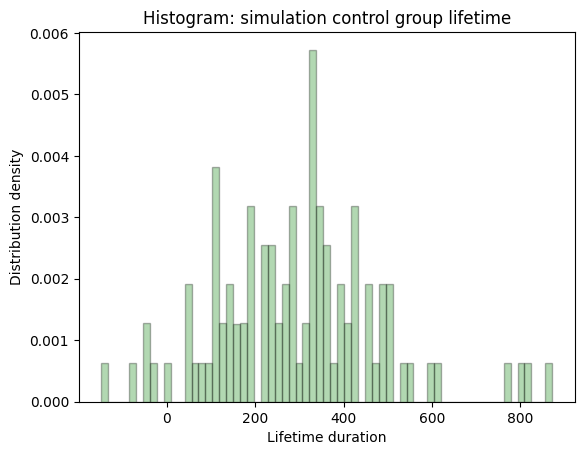

In [26]:
plot_group_histogram_vs_simulation_histogram(control_lifetime, 'control')

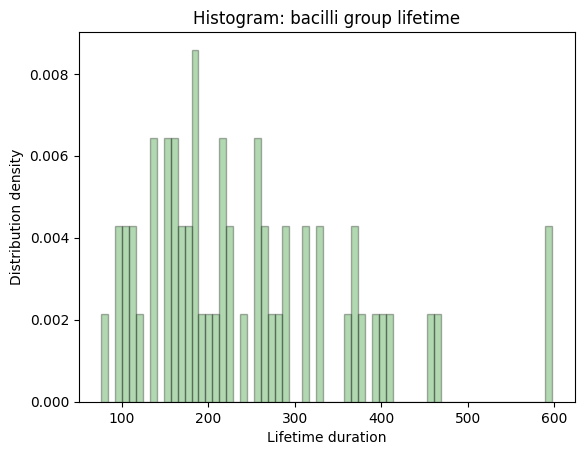

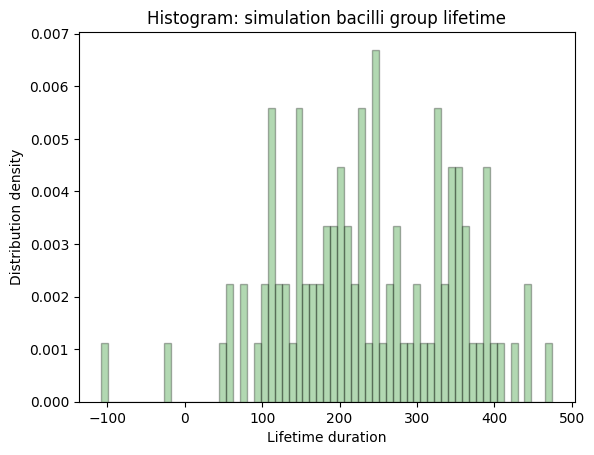

In [27]:
plot_group_histogram_vs_simulation_histogram(bacilli_lifetime, 'bacilli')

After visually comparing the histograms, it can be concluded that our data indeed more closely align with a ***Normal distribution*** than the other two distributions considered (***Uniform*** and ***Exponential***).

Both groups exhibit the characteristic bell-shaped curve of a normal distribution, with tails on both the left and right sides. However, the second group is noticeably closer to a ***Normal distribution*** than the first. This is evident in the way its data points cluster around the mean and how the tails extend symmetrically on either side, indicating a more pronounced adherence to the properties of a ***Normal distribution***.

**5. Calculate a two-sided 95% confidence interval for the mean separately for each group.**

This code block introduces two functions focused on calculating and presenting the 95% confidence interval for the mean lifetime duration of each guinea pig group.

`get_group_confidence_interval`: This function calculates the 95% confidence interval for the mean of the group's lifetime data using the ***t-distribution***, appropriate for normally distributed populations or large sample sizes as per the ***Central Limit Theorem***. The confidence interval is determined using the formula:

  $$\text{mean} \pm (t_{\text{critical}} \times \text{SEM})$$

  where:
  - `mean` is the ***sample mean*** of the group's data.
  - `t_critical` is the ***critical value from the t-distribution*** corresponding to the 95% confidence level and the specific degrees of freedom `(n-1)`, where `(n)` is the sample size.
  - `SEM` or ***Standard Error of the Mean*** is calculated as `(s / sqrt(n))`, where `(s)` is the sample standard deviation and `(n)` is the sample size.

The function uses the `SciPy` library to derive the critical t-values and computes the confidence interval accordingly.

`print_group_confidence_interval`: This function prints the 95% confidence interval for the mean of the group's lifetime data. It leverages `get_group_confidence_interval` to compute the interval and then displays it alongside the group's name. This provides a clear, textual representation of the range within which the true mean of the group's lifetime is statistically likely to lie with 95% confidence.

In [28]:
def get_group_confidence_interval(group_data):
    """
    Calculates the 95% confidence interval for the mean of the group's data using the t-distribution.

    This function calculates the 95% confidence interval for the mean of a given data series
    based on the t-distribution. It is applicable for data samples from normally distributed populations
    or for large sample sizes according to the Central Limit Theorem. The function uses the SciPy library
    to derive the t-distribution's critical values.

    The confidence interval is calculated using the formula:
        mean ± (t_critical * standard error of the mean)
    where t_critical is the critical value from the t-distribution for the given confidence level and degrees of freedom,
    and the standard error of the mean is the sample standard deviation divided by the square root of the sample size.

    :param group_data: The data for which the confidence interval is to be calculated.
                       It should be a series of numerical values.
    :type group_data: pandas.Series

    :return: A tuple representing the lower and upper bounds of the 95% confidence interval for the mean.
             The interval is computed using the t-distribution and accounts for the sample size and sample standard deviation.
    :rtype: tuple
    """
    confidence_level = 0.95
    freedom_degree = len(group_data) - 1

    group_mean = get_group_norm_mu(group_data)
    group_deviation = get_group_norm_sigma(group_data)
    group_size = len(group_data)

    return t.interval(confidence_level, freedom_degree, group_mean, group_deviation / np.sqrt(group_size))


def print_group_confidence_interval(group_data, group_name):
    """
    Prints the 95% confidence interval for the mean of the group's data.

    :param group_data: The data for which the confidence interval is to be printed.
    :type group_data: pandas.Series

    :param group_name: The name of the group.
    :type group_name: str
    """
    confidence_interval = get_group_confidence_interval(group_data)

    print(f'Group name: {group_name}.')
    print(f'Group lifetime mean 95% confidence interval: {confidence_interval}.')

In [29]:
print_group_confidence_interval(control_lifetime, 'control')

Group name: control.
Group lifetime mean 95% confidence interval: (289.73112165285454, 400.73762834714546).


In [30]:
print_group_confidence_interval(bacilli_lifetime, 'bacilli')

Group name: bacilli.
Group lifetime mean 95% confidence interval: (211.5261393456364, 273.542826171605).


The results presented indicate the 95% confidence intervals for the mean lifetime duration of the ***control*** and ***bacilli-infected groups*** of guinea pigs.

For the ***control group***, with 95% confidence, the mean lifetime is estimated to be between approximately 289.73 and 400.74 time units.

For the ***bacilli-infected group***, the mean lifetime is estimated with 95% confidence to fall between approximately 211.53 and 273.54 time units.

These intervals suggest that, based on the data sampled, we can be 95% certain that the true mean lifetime of the control group lies within the first interval and that of the bacilli-infected group lies within the second interval. The non-overlapping nature of these intervals also suggests a significant difference in mean lifetimes between the two groups.

**6. Test the hypothesis at the 5% significance level for each group separately to see if the mean value is
equal to the value K (parameter of the task), against a two-sided alternative.
You may use either the result from the previous point or the output from the respective built-in function of your software.**

This code block contains functions to perform and report the results of a t-test, which assesses whether the mean lifetime of each guinea pig group significantly differs from a specific value `k`, taken from the topic configuration. The test is conducted at a 5% significance level.

`get_group_mean_test`: This function computes the t-statistic using the formula:
  $$
  t = \frac{(\text{mean} - k) \times \sqrt{n}}{sd}
  $$

  where:
  - `mean` is the ***sample mean*** of the group's data,
  - `n` is the ***sample size***,
  - `sd` is the ***sample standard deviation***, and
  - `k` is the ***comparison value*** from the external configuration.

  The function also calculates the ***critical t-value*** from the t-distribution considering the given significance level and the ***degrees of freedom*** (which is the sample size minus one). The outcome is a tuple containing the ***t-statistic*** and the ***critical t-value***.

`print_group_mean_test_stats`: Upon running `get_group_mean_test`, this function prints the test statistics, including the ***t-statistic*** and the ***critical t-value***. It further indicates whether the null hypothesis `H_0`: Group lifetime mean is equal to `k` is rejected in favor of the alternative hypothesis `H_A`: Group lifetime mean is not equal to `k`, determined by whether the absolute t-statistic exceeds the critical value.

The functions illustrate a statistical hypothesis testing method where the null hypothesis assumes that the group's mean lifetime is equal to a specified value `k`, and the alternative hypothesis contends it is different. The test determines if the observed mean lifetime is statistically significantly different from `k` at the 5% significance level, a standard threshold for asserting a confident statistical decision.


In [31]:
def get_group_mean_test(group_data):
    """
    Performs a t-test to compare the group mean with a specified value (k).

    This function calculates the t-statistic to test whether the mean of the group's data
    significantly differs from the specified value k. It uses the t-distribution to determine
    the critical value for a specified significance level.

    The t-statistic is calculated using the formula:
        (mean - k) * sqrt(n) / sd
    where mean is the sample mean, n is the sample size, and sd is the sample standard deviation.
    k is a specified value to test against, and it is taken from the external configuration.

    :param group_data: The data for which the t-test is to be performed.
    :type group_data: pandas.Series

    :return: A tuple containing the calculated t-statistic and the critical t-value.
    :rtype: tuple
    """
    k = topic_config['BIRTH_DAY']
    significance_level = 0.05
    freedom_degree = len(group_data) - 1

    group_mean = get_group_norm_mu(group_data)
    group_deviation = get_group_norm_sigma(group_data)
    group_size = len(group_data)

    return (((group_mean - k) * np.sqrt(group_size)) / group_deviation), t.ppf(1 - (significance_level / 2), freedom_degree)


def print_group_mean_test_stats(group_data, group_name):
    """
    Prints the results of a t-test comparing the group's mean to a specified value (k).

    This function performs the t-test and then prints the test statistics including the t-statistic,
    the critical t-value, and the result of the hypothesis test.

    :param group_data: The data for which the t-test statistics are to be printed.
    :type group_data: pandas.Series

    :param group_name: The name of the group.
    :type group_name: str
    """
    t_statistic, t_critical = get_group_mean_test(group_data)
    test_result = abs(t_statistic) > t_critical

    print(f'Group name: {group_name}.')
    print('Group lifetime mean test:')
    print(f'    - significance_level: 5%.')
    print(f'    - k: {topic_config["BIRTH_DAY"]}.')
    print(f'    - H_0: Group lifetime mean = k.')
    print(f'    - H_A: Group lifetime mean ≠ k.')
    print('Group lifetime mean test stats:')
    print(f'    - T_statistic: {t_statistic}.')
    print(f'    - t_critical: {t_critical}.')
    print(f'    - |T_statistic| > t_critical: {test_result}.')
    print(f'    - H_0 rejection in favor of H_A: {test_result}.')

In [32]:
print_group_mean_test_stats(control_lifetime, 'control')

Group name: control.
Group lifetime mean test:
    - significance_level: 5%.
    - k: 3.
    - H_0: Group lifetime mean = k.
    - H_A: Group lifetime mean ≠ k.
Group lifetime mean test stats:
    - T_statistic: 12.3218151208742.
    - t_critical: 1.9983405417721956.
    - |T_statistic| > t_critical: True.
    - H_0 rejection in favor of H_A: True.


In [33]:
print_group_mean_test_stats(bacilli_lifetime, 'bacilli')

Group name: bacilli.
Group lifetime mean test:
    - significance_level: 5%.
    - k: 3.
    - H_0: Group lifetime mean = k.
    - H_A: Group lifetime mean ≠ k.
Group lifetime mean test stats:
    - T_statistic: 15.46872470253481.
    - t_critical: 2.0024654580545986.
    - |T_statistic| > t_critical: True.
    - H_0 rejection in favor of H_A: True.


The results from the t-tests for both the ***control*** and ***bacilli groups*** indicate a significant difference between the group mean and the specified value `k` of 3.

With a 5% significance level, the ***t-statistics*** for both groups (approximately 12.32 for the control group and 15.47 for the bacilli group) are greater than the ***critical t-values*** (approximately 1.99 for both groups).

This means that for both the control and bacilli groups, we reject the null hypothesis that the group lifetime mean is equal to 3. The alternative hypothesis, which states that the group lifetime mean is not equal to 3, is supported. This suggests that the average lifetime for both groups is significantly different from 3 days, with the provided sample data and at the given level of significance.

**7. Test at the 5% significance level whether the observed groups have the same mean.
Choose the type of test and alternatives to best correspond with the nature of the problem under investigation.**

This code block includes functions that perform a t-test to compare the average lifetimes between two distinct groups of guinea pigs, with a hypothesis test at a 5% significance level.

The t-test assesses whether the mean lifetime of the first group is statistically greater than or equal to that of the second group, based on prior observations.

`get_groups_mean_test`: This function calculates the ***t-statistic*** for two independent samples. The formula used for the ***t-statistic***, taking into account the `pooled standard error`, is:

  $$
  t = \frac{\text{mean}_1 - \text{mean}_2}{\text{pooled standard error}}
  $$

  where `mean_1` and `mean_2` are the sample means, and the `pooled standard error` is calculated as:

  $$
  \text{pooled standard error} = \sqrt{\frac{\text{variance}_1}{\text{size}_1} + \frac{\text{variance}_2}{\text{size}_2}}
  $$

  The `degrees of freedom` used in determining the ***critical t-value*** are approximated using the ***Welch-Satterthwaite equation***:

  $$
  \text{degrees of freedom} = \frac{\left(\frac{\text{variance}_1}{\text{size}_1} + \frac{\text{variance}_2}{\text{size}_2}\right)^2}{\frac{\left(\frac{\text{variance}_1}{\text{size}_1}\right)^2}{\text{size}_1 - 1} + \frac{\left(\frac{\text{variance}_2}{\text{size}_2}\right)^2}{\text{size}_2 - 1}}
  $$

`print_groups_mean_test_stats`: Following the t-test computation, this function outputs the ***t-statistic*** along with the ***critical t-value*** from the t-distribution. It also indicates the decision of the hypothesis test.

The null hypothesis `H_0` states that the mean lifetime of the first group is greater than or equal to the mean lifetime of the second group. Conversely, the alternative hypothesis `H_A` posits that the first group's mean lifetime is less than the second group's. The test's outcome reveals whether there is sufficient evidence to reject `H_0` in favor of `H_A`.

This methodology is critical for accurately evaluating the statistical differences in lifetime between two guinea pig populations and can lead to important insights regarding their comparative longevity.


In [34]:
def get_groups_mean_test(group1_data, group2_data):
    """
    Performs a t-test to compare the means of two groups.

    This function calculates the t-statistic to test whether the mean of the first group
    is significantly different from the mean of the second group. It uses the t-distribution
    to determine the critical value for a specified significance level.

    The t-statistic is calculated using a formula that accounts for pooled variance
    and the sample sizes of both groups. The t-distribution is used to find the
    critical value at a 5% significance level.

    :param group1_data: The data of the first group.
    :type group1_data: pandas.Series

    :param group2_data: The data of the second group.
    :type group2_data: pandas.Series

    :return: A tuple containing the calculated t-statistic and the critical t-value.
    :rtype: tuple
    """
    significance_level = 0.05

    group1_mean, group2_mean = get_group_norm_mu(group1_data), get_group_norm_mu(group2_data)
    group1_deviation, group2_deviation = get_group_norm_sigma(group1_data), get_group_norm_sigma(group2_data)
    group1_variance, group2_variance = group1_deviation ** 2, group2_deviation ** 2
    group1_size, group2_size = len(group1_data), len(group2_data)

    pooled_variance = np.sqrt((group1_variance / group1_size) + (group2_variance / group2_size))
    pooled_freedom_degree = np.sqrt((pooled_variance ** 4) /
        ((group1_variance / group1_size) ** 2 / (group1_size - 1)) + ((group2_variance / group2_size) ** 2 / (group2_size - 1)))

    return ((group1_mean - group2_mean) / pooled_variance), t.ppf(1 - significance_level, pooled_freedom_degree)


def print_groups_mean_test_stats(group1_data, group1_name, group2_data, group2_name):
    """
    Prints the results of a t-test comparing the means of two groups.

    This function performs the t-test and then prints the test statistics including the t-statistic,
    the critical t-value, and the result of the hypothesis test. It tests the hypothesis that the
    mean of the first group is greater than or equal to the mean of the second group.

    :param group1_data: The data of the first group.
    :type group1_data: pandas.Series

    :param group1_name: The name of the first group.
    :type group1_name: str

    :param group2_data: The data of the second group.
    :type group2_data: pandas.Series

    :param group2_name: The name of the second group.
    :type group2_name: str
    """
    t_statistic, t_critical = get_groups_mean_test(group1_data, group2_data)
    test_result = t_statistic < -t_critical

    print(f'Group 1 name: {group1_name}.')
    print(f'Group 2 name: {group2_name}.')
    print('Groups lifetime mean test:')
    print(f'    - significance_level: 5%.')
    print(f'    - Group 1 lifetime mean: {get_group_norm_mu(group1_data)}.')
    print(f'    - Group 2 lifetime mean: {get_group_norm_mu(group2_data)}.')
    print(f'    - H_0: Group 1 lifetime mean ≥ Group 2 lifetime mean.')
    print(f'    - H_A: Group 1 lifetime mean < Group 2 lifetime mean.')
    print('Groups lifetime mean test stats:')
    print(f'    - T_statistic: {t_statistic}.')
    print(f'    - t_critical: {t_critical}.')
    print(f'    - T_statistic < -t_critical: {test_result}.')
    print(f'    - H_0 rejection in favor of H_A: {test_result}.')

In [35]:
print_groups_mean_test_stats(control_lifetime, 'control', bacilli_lifetime, 'bacilli')

Group 1 name: control.
Group 2 name: bacilli.
Groups lifetime mean test:
    - significance_level: 5%.
    - Group 1 lifetime mean: 345.234375.
    - Group 2 lifetime mean: 242.5344827586207.
    - H_0: Group 1 lifetime mean ≥ Group 2 lifetime mean.
    - H_A: Group 1 lifetime mean < Group 2 lifetime mean.
Groups lifetime mean test stats:
    - T_statistic: 3.229587975919881.
    - t_critical: 1.6917443337779088.
    - T_statistic < -t_critical: False.
    - H_0 rejection in favor of H_A: False.


The t-test results for the ***control*** and ***bacilli groups*** show that the ***t-statistic*** value is 3.229, and the ***critical t-value*** for a 5% significance level is approximately 1.692. Since the ***t-statistic*** is greater than the ***critical value***, and the test result for the inequality T_statistic < -t_critical is False, we do not reject the null hypothesis `H_0` at the 5% significance level.

This indicates there isn't statistically significant evidence to conclude that the mean lifetime of the ***control group*** is less than the mean lifetime of the ***bacilli group***, based on the sample data provided.